In [3]:
import pandas as pd


def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset


def export_dataset_to_file(dataset: pd.DataFrame):
    """
    Функция экспортирования результата в файл result.txt.
    :param dataset: входная структура данных.
    """
    n, c = dataset.shape

    assert c == 3, 'Количество столбцов должно быть 3'
    assert n == 1196590, 'Количество строк должно быть 1196590'

    with open('C:\Python 3.11\Data\Result.txt', 'w') as f:
        for i in range(n):
            f.write('%.2f %.2f %.5f\n' % (dataset.x[i], dataset.y[i], dataset.z[i]))


if __name__ == "__main__":
    # Вспомогательные данные, по которым производится моделирование
    map_1_dataset = import_dataset_from_file("C:\Python 3.11\Data\Data\Map_1.txt")
    map_2_dataset = import_dataset_from_file("C:\Python 3.11\Data\Data\Map_2.txt")
    map_3_dataset = import_dataset_from_file("C:\Python 3.11\Data\Data\Map_3.txt")
    map_4_dataset = import_dataset_from_file("C:\Python 3.11\Data\Data\Map_4.txt")
    map_5_dataset = import_dataset_from_file("C:\Python 3.11\Data\Data\Map_5.txt")

    # Данные, по которым необходимо смоделировать
    point_dataset = import_dataset_from_file("C:\Python 3.11\Data\Data\Point_dataset.txt")

    # Точки данных, в которые необходимо провести моделирование (сетка данных)
    result = import_dataset_from_file("C:\Python 3.11\Data\Data\Result_schedule.txt")

In [4]:
from sklearn.metrics import mean_squared_error, make_scorer

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
map_1_dataset.shape

(1196495, 3)

In [9]:
map_2_dataset.shape

(1196495, 3)

In [10]:
map_3_dataset.shape

(1197106, 3)

In [11]:
map_4_dataset.shape

(1197106, 3)

In [12]:
map_5_dataset.shape

(1196495, 3)

In [13]:
map_1_dataset.rename({'z' : 'map_1'}, axis = 1, inplace = True)
map_2_dataset.rename({'z' : 'map_2'}, axis = 1, inplace = True)
map_3_dataset.rename({'z' : 'map_3'}, axis = 1, inplace = True)
map_4_dataset.rename({'z' : 'map_4'}, axis = 1, inplace = True)
map_5_dataset.rename({'z' : 'map_5'}, axis = 1, inplace = True)

In [14]:
temp1 = pd.merge(map_1_dataset, map_2_dataset, on = ['x','y'], how = 'outer') 
temp2 = pd.merge(temp1, map_3_dataset, on = ['x','y'], how = 'outer') 
temp3 = pd.merge(temp2, map_4_dataset, on = ['x','y'], how = 'outer') 
full_data = pd.merge(temp3, map_5_dataset, on = ['x','y'], how = 'outer') 

In [15]:
full_data.isnull().sum()

x          0
y          0
map_1    643
map_2    643
map_3     32
map_4     32
map_5    643
dtype: int64

In [16]:
data = full_data.dropna()

In [17]:
data

,x,y,map_1,map_2,map_3,map_4,map_5
0,68239.21,24467.0,0.15633,0.11137,40.34349,4142.3389,1.67671
1,68251.71,24467.0,0.15675,0.11094,40.47934,4139.9224,1.67665
2,68264.21,24467.0,0.15718,0.11095,40.69317,4138.2324,1.67664
3,68276.71,24467.0,0.15698,0.11070,40.84084,4138.5000,1.67664
4,68289.21,24467.0,0.15696,0.11088,41.04373,4138.9688,1.67669
...,...,...,...,...,...,...,...
1196490,53239.21,46942.0,0.16870,0.11056,41.69809,4022.7290,1.67625
1196491,53251.71,46942.0,0.16834,0.11066,37.70777,4022.9558,1.67616
1196492,53264.21,46942.0,0.16873,0.10918,37.66273,4022.3235,1.67590
1196493,53276.71,46942.0,0.16878,0.10950,37.21101,4023.4590,1.67592


In [18]:
data.isnull().sum()

x        0
y        0
map_1    0
map_2    0
map_3    0
map_4    0
map_5    0
dtype: int64

<Axes: >

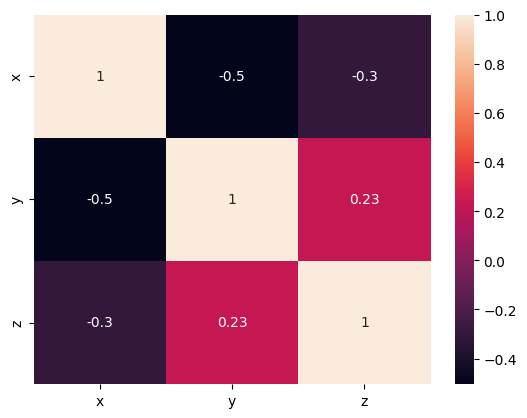

In [19]:
sns.heatmap(point_dataset.corr(), annot = True)

In [20]:
data.dtypes

x        float64
y        float64
map_1    float64
map_2    float64
map_3    float64
map_4    float64
map_5    float64
dtype: object

In [22]:
scr = make_scorer(mean_squared_error)

In [23]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

In [24]:
knn = KNNR(n_neighbors = 20)

In [25]:
X = data[['x', 'y']]

In [26]:
for i in range(1,6):
    y = data['map_' + str(i)]
    knn.fit(X,y)
    point_dataset['map_' + str(i)] = knn.predict(point_dataset[['x', 'y']])

In [27]:
point_dataset

,x,y,z,map_1,map_2,map_3,map_4,map_5
0,44222.21,35600.90,14.974396,0.176670,0.124929,41.685905,4038.797665,1.680016
1,60003.40,26172.72,14.078868,0.149704,0.119059,36.258652,4198.836950,1.680362
2,44300.61,35291.79,14.261570,0.171073,0.131689,41.580666,4078.136485,1.680775
3,52776.47,33453.18,15.347562,0.138930,0.131195,37.258719,4301.333615,1.682135
4,49636.39,30697.34,14.422570,0.142932,0.119120,37.399737,4198.483670,1.678815
...,...,...,...,...,...,...,...,...
436,65193.40,26832.74,9.374795,0.156471,0.122228,35.606690,4266.839495,1.670972
437,50022.04,40606.42,7.636603,0.163119,0.136436,41.563619,4173.293585,1.670853
438,43745.18,35114.25,14.622497,0.177291,0.122924,41.789951,4034.779060,1.679356
439,71483.43,25152.76,11.014532,0.149291,0.118284,41.136205,4189.155660,1.678958


In [28]:
knn.fit(point_dataset.drop(['z'], axis = 1), point_dataset['z'])

KNeighborsRegressor(n_neighbors=20)

In [32]:
data

,x,y,map_1,map_2,map_3,map_4,map_5
0,68239.21,24467.0,0.15633,0.11137,40.34349,4142.3389,1.67671
1,68251.71,24467.0,0.15675,0.11094,40.47934,4139.9224,1.67665
2,68264.21,24467.0,0.15718,0.11095,40.69317,4138.2324,1.67664
3,68276.71,24467.0,0.15698,0.11070,40.84084,4138.5000,1.67664
4,68289.21,24467.0,0.15696,0.11088,41.04373,4138.9688,1.67669
...,...,...,...,...,...,...,...
1196490,53239.21,46942.0,0.16870,0.11056,41.69809,4022.7290,1.67625
1196491,53251.71,46942.0,0.16834,0.11066,37.70777,4022.9558,1.67616
1196492,53264.21,46942.0,0.16873,0.10918,37.66273,4022.3235,1.67590
1196493,53276.71,46942.0,0.16878,0.10950,37.21101,4023.4590,1.67592


In [35]:
data['z'] = knn.predict(data)

C:\Users\Anvar Mukumov\AppData\Local\Temp\ipykernel_13352\2122543674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z'] = knn.predict(data)


In [36]:
data

,x,y,map_1,map_2,map_3,map_4,map_5,z
0,68239.21,24467.0,0.15633,0.11137,40.34349,4142.3389,1.67671,12.460607
1,68251.71,24467.0,0.15675,0.11094,40.47934,4139.9224,1.67665,12.460607
2,68264.21,24467.0,0.15718,0.11095,40.69317,4138.2324,1.67664,12.460607
3,68276.71,24467.0,0.15698,0.11070,40.84084,4138.5000,1.67664,12.460607
4,68289.21,24467.0,0.15696,0.11088,41.04373,4138.9688,1.67669,12.460607
...,...,...,...,...,...,...,...,...
1196490,53239.21,46942.0,0.16870,0.11056,41.69809,4022.7290,1.67625,13.765454
1196491,53251.71,46942.0,0.16834,0.11066,37.70777,4022.9558,1.67616,13.765454
1196492,53264.21,46942.0,0.16873,0.10918,37.66273,4022.3235,1.67590,13.765454
1196493,53276.71,46942.0,0.16878,0.10950,37.21101,4023.4590,1.67592,13.765454


<Axes: xlabel='y', ylabel='x'>

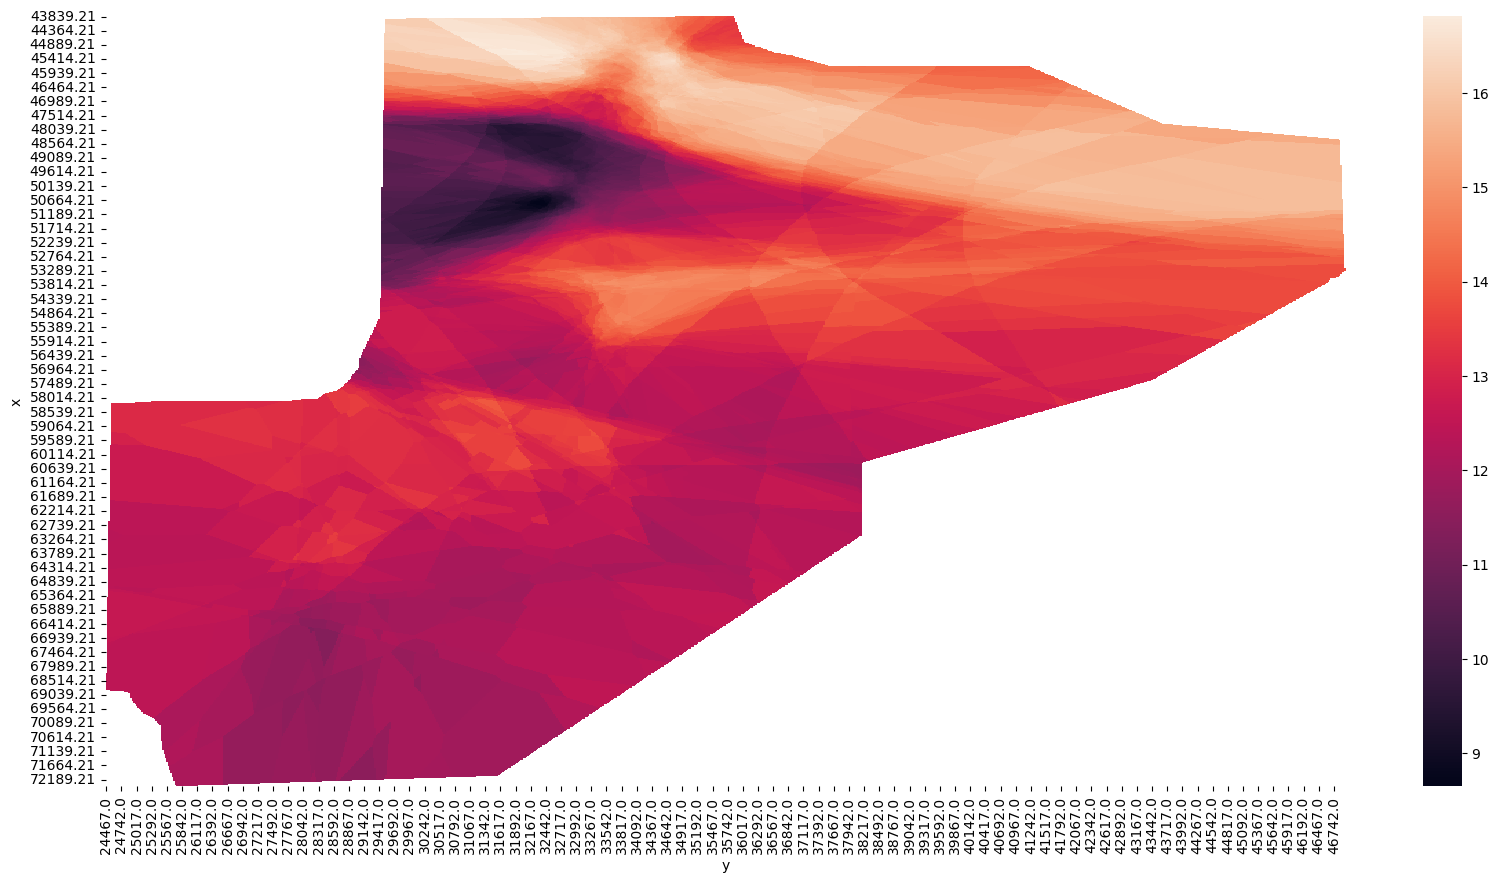

In [41]:
plt.figure(figsize=(20, 10))
eee = pd.DataFrame(data={'x':data['x'], 'y':data['y'], 'z':data['z']})
eee = eee.pivot(index='x', columns='y', values='z')
sns.heatmap(eee)

In [42]:
import lightgbm as lgb

In [43]:
reglgbm = lgb.LGBMRegressor(colsample_bytree=0.858, max_depth=4, min_child_weight=2.693, n_estimators=400, subsample= 0.715, random_state=42,
                            learning_rate=0.0513, reg_alpha=0.065, reg_lambda=0.0731, min_data_in_leaf=2, verbose= -1)

In [46]:
X = point_dataset.drop(['z'], axis = 1)
y = point_dataset['z']

In [52]:
cross_val_score(reglgbm, X, y, scoring = scr).mean()

0.9401648271179829

In [47]:
reglgbm.fit(X, y)

LGBMRegressor(colsample_bytree=0.858, learning_rate=0.0513, max_depth=4,
              min_child_weight=2.693, min_data_in_leaf=2, n_estimators=400,
              random_state=42, reg_alpha=0.065, reg_lambda=0.0731,
              subsample=0.715, verbose=-1)

In [48]:
data['z'] = reglgbm.predict(data.drop(['z'], axis = 1))

C:\Users\Anvar Mukumov\AppData\Local\Temp\ipykernel_13352\1090153670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z'] = reglgbm.predict(data.drop(['z'], axis = 1))


<Axes: xlabel='y', ylabel='x'>

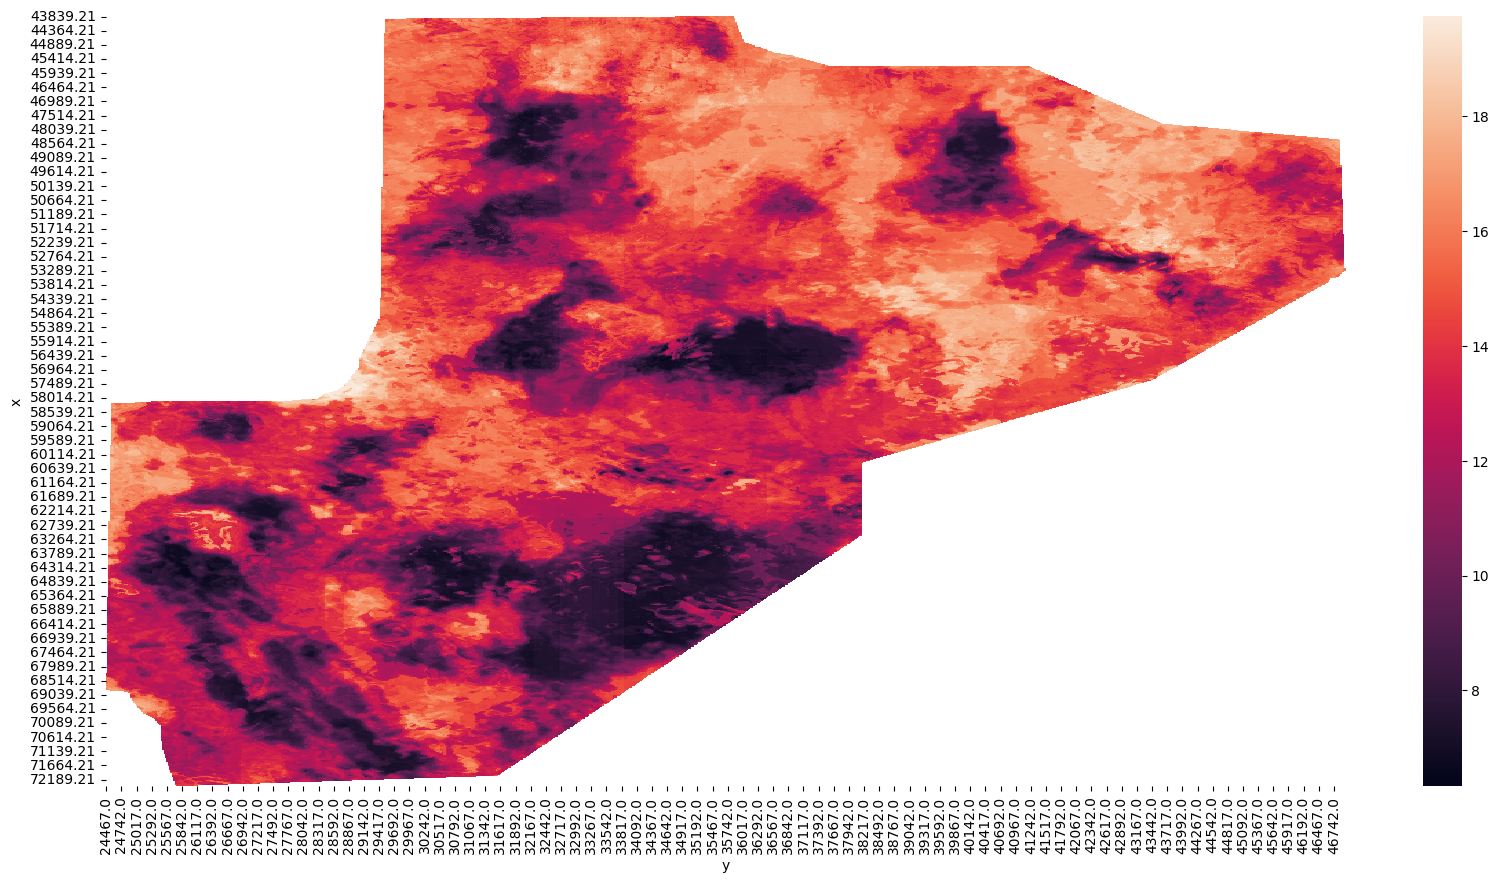

In [49]:
plt.figure(figsize=(20, 10))
eee = pd.DataFrame(data={'x':data['x'], 'y':data['y'], 'z':data['z']})
eee = eee.pivot(index='x', columns='y', values='z')
sns.heatmap(eee)

In [53]:
result

,x,y,z
0,68239.21,24467.0,NaN
1,68251.71,24467.0,NaN
2,68264.21,24467.0,NaN
3,68276.71,24467.0,NaN
4,68289.21,24467.0,NaN
...,...,...,...
1196585,53264.21,46942.0,NaN
1196586,53276.71,46942.0,NaN
1196587,53289.21,46942.0,NaN
1196588,53301.71,46942.0,NaN


In [57]:
full_data = result.merge(full_data, on=['x', 'y'], how = 'left')

In [59]:
full_data.isnull().sum()

x              0
y              0
z        1196590
map_1         95
map_2         95
map_3        106
map_4        106
map_5         95
dtype: int64

In [96]:
X = map_1_dataset.drop(['map_1'], axis = 1)
y = map_1_dataset['map_1']
knn.fit(X, y)
m1 = knn.predict(full_data.query('map_1.isnull()')[['x', 'y']])

In [98]:
X = map_2_dataset.drop(['map_2'], axis = 1)
y = map_2_dataset['map_2']
knn.fit(X, y)
m2 = knn.predict(full_data.query('map_2.isnull()')[['x', 'y']])

In [99]:
X = map_3_dataset.drop(['map_3'], axis = 1)
y = map_3_dataset['map_3']
knn.fit(X, y)
m3 = knn.predict(full_data.query('map_3.isnull()')[['x', 'y']])

In [100]:
X = map_4_dataset.drop(['map_4'], axis = 1)
y = map_4_dataset['map_4']
knn.fit(X, y)
m4 = knn.predict(full_data.query('map_4.isnull()')[['x', 'y']])

In [101]:
X = map_5_dataset.drop(['map_5'], axis = 1)
y = map_5_dataset['map_5']
knn.fit(X, y)
m5 = knn.predict(full_data.query('map_5.isnull()')[['x', 'y']])

In [108]:
full_data.loc[full_data['map_1'].isnull(), 'map_1'] = m1

In [110]:
full_data.loc[full_data['map_2'].isnull(), 'map_2'] = m2
full_data.loc[full_data['map_3'].isnull(), 'map_3'] = m3
full_data.loc[full_data['map_4'].isnull(), 'map_4'] = m4
full_data.loc[full_data['map_5'].isnull(), 'map_5'] = m5

In [112]:
full_data.isnull().sum()

x              0
y              0
z        1196590
map_1          0
map_2          0
map_3          0
map_4          0
map_5          0
dtype: int64

In [113]:
X = full_data.drop(['z'], axis = 1)
result['z'] = reglgbm.predict(X)

In [114]:
result

,x,y,z
0,68239.21,24467.0,12.652773
1,68251.71,24467.0,12.866847
2,68264.21,24467.0,13.018829
3,68276.71,24467.0,12.975971
4,68289.21,24467.0,12.788298
...,...,...,...
1196585,53264.21,46942.0,16.062815
1196586,53276.71,46942.0,15.973005
1196587,53289.21,46942.0,15.480917
1196588,53301.71,46942.0,15.346743


In [115]:
export_dataset_to_file(result)